In [2]:
import numpy as np
import sys
import os
import pickle
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
def moving_average(x,w):
    w_min=1#int(np.floor(w/2))
    return pd.Series(x).rolling(w, min_periods=w_min).mean()
av_window=10

In [4]:
save_dir = '/nese/mit/group/evlab/projects/Greta_Eghbal_manifolds/extracted/'

In [5]:
model_identifier= 'NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.000161_sigma=5.0_nfeat=936-train_test-fixed_data_figure_4.pkl'
d_fig_4=pickle.load(open(os.path.join(save_dir,model_identifier),'rb'))
x_bar=d_fig_4['x_bar']
hier_within_class=d_fig_4['hier_within_class']
hier_between_class=d_fig_4['hier_between_class']
covar_res=d_fig_4['covar_res']
accuracies=d_fig_4['accuracies']
epoch_bar=d_fig_4['epoch_bar']
epoch_batch=d_fig_4['epoch_batch']
layers=d_fig_4['layers']

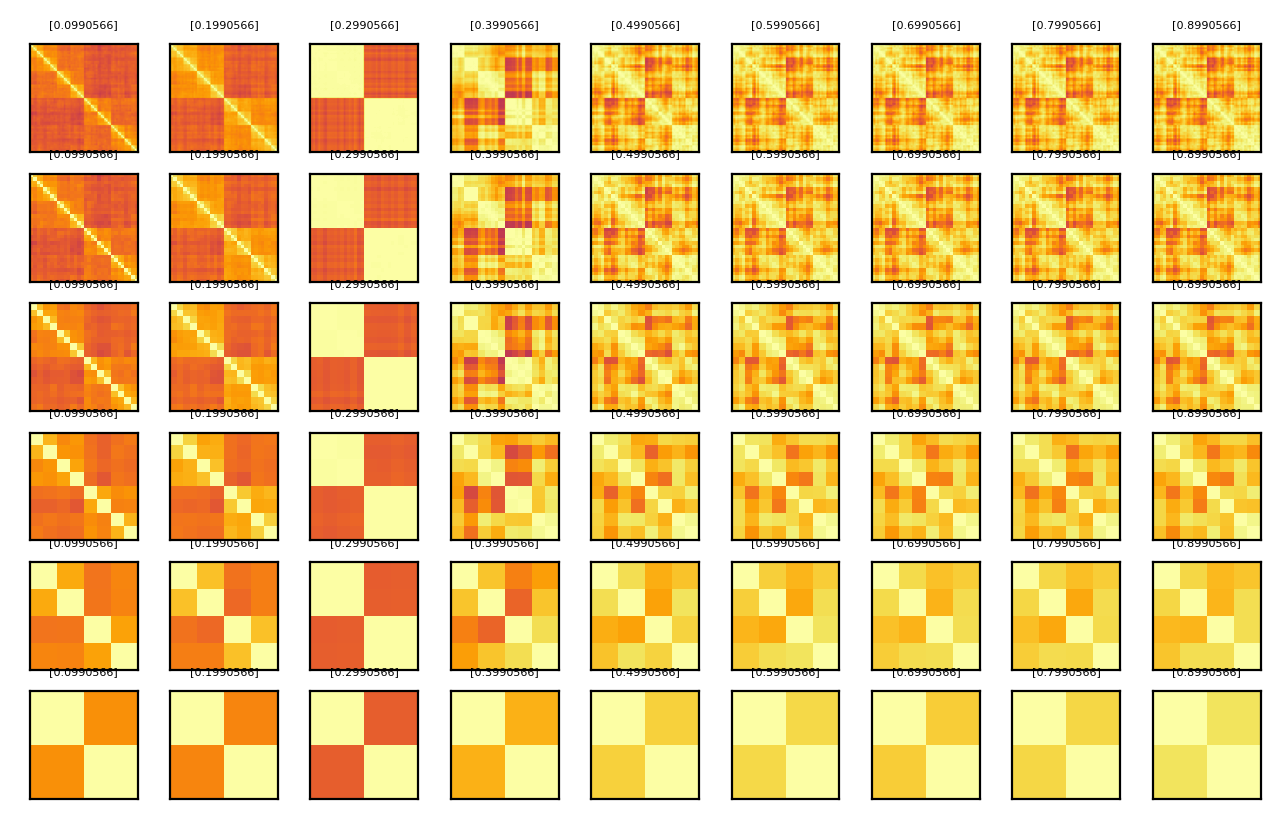

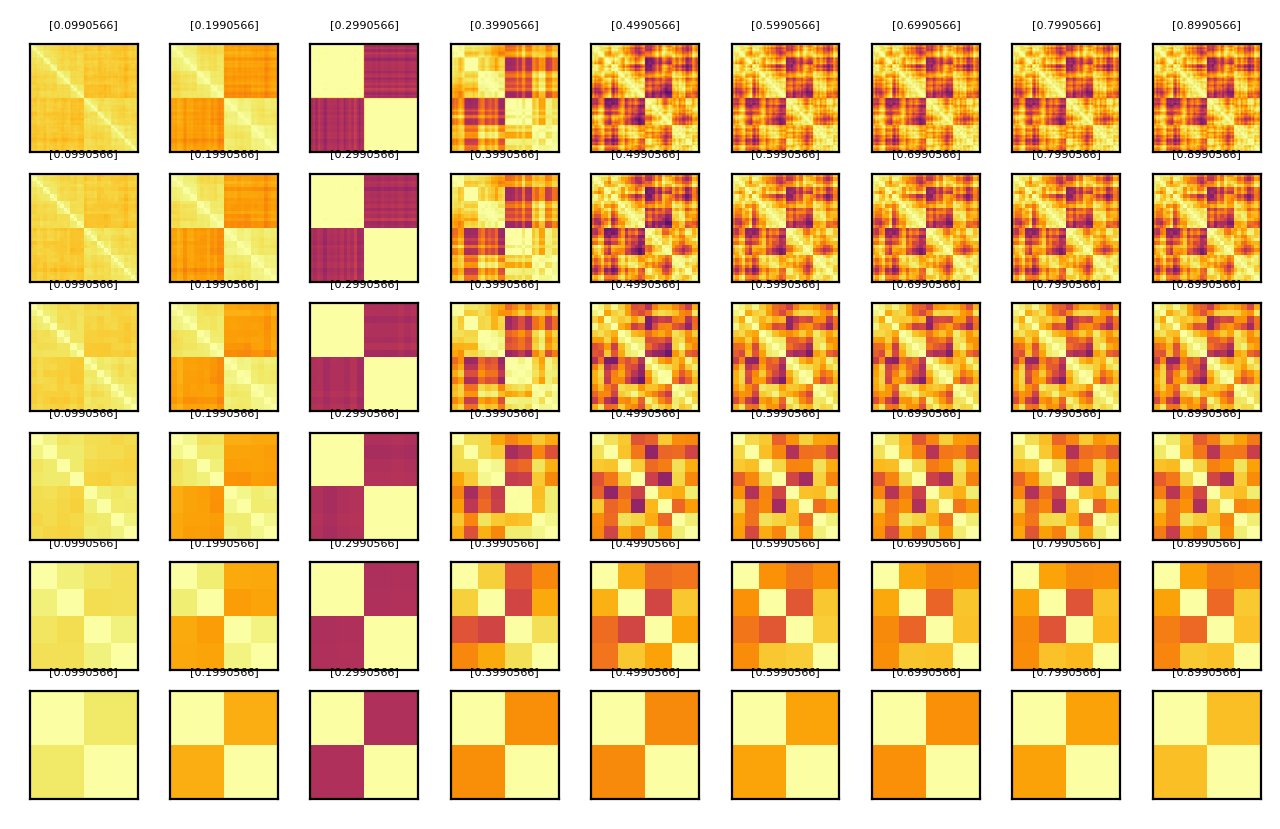

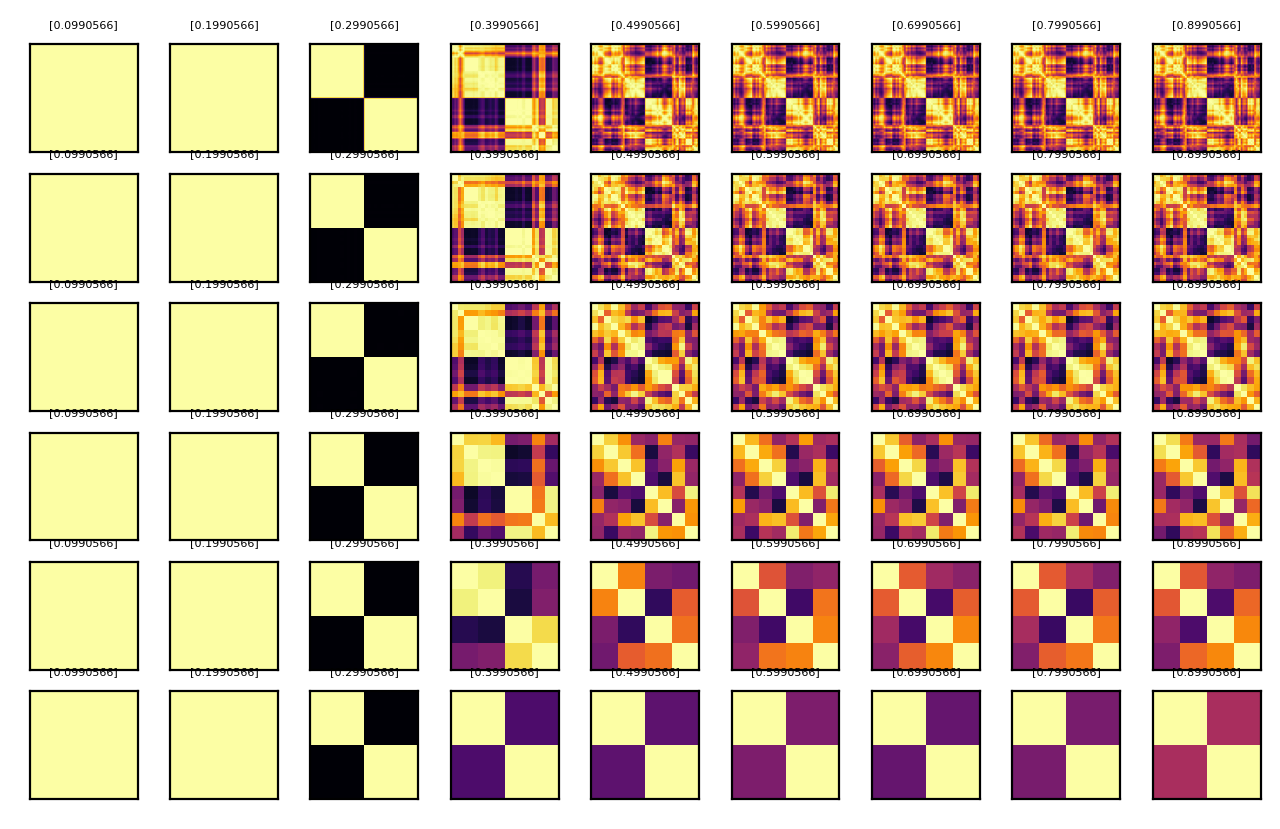

In [7]:
from matplotlib import animation
k=500
for layer in layers:
    fig, axes = plt.subplots(6, 9, figsize=(8, 5),dpi=200,frameon=False)
    for hier_idx in range(6):
        for idy, epo in enumerate(epoch_bar):
            k=int(np.argwhere(x_bar==epo))  
            image = axes[hier_idx,idy].imshow(np.asarray(covar_res[layer][k]['center_covar'][hier_idx]['center_cov']).squeeze(),vmin=0,vmax=2,cmap=plt.get_cmap('inferno_r'))
            axes[hier_idx,idy].set_xticks([])
            axes[hier_idx,idy].set_yticks([])
            axes[hier_idx,idy].set_title(epo,fontsize=4)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


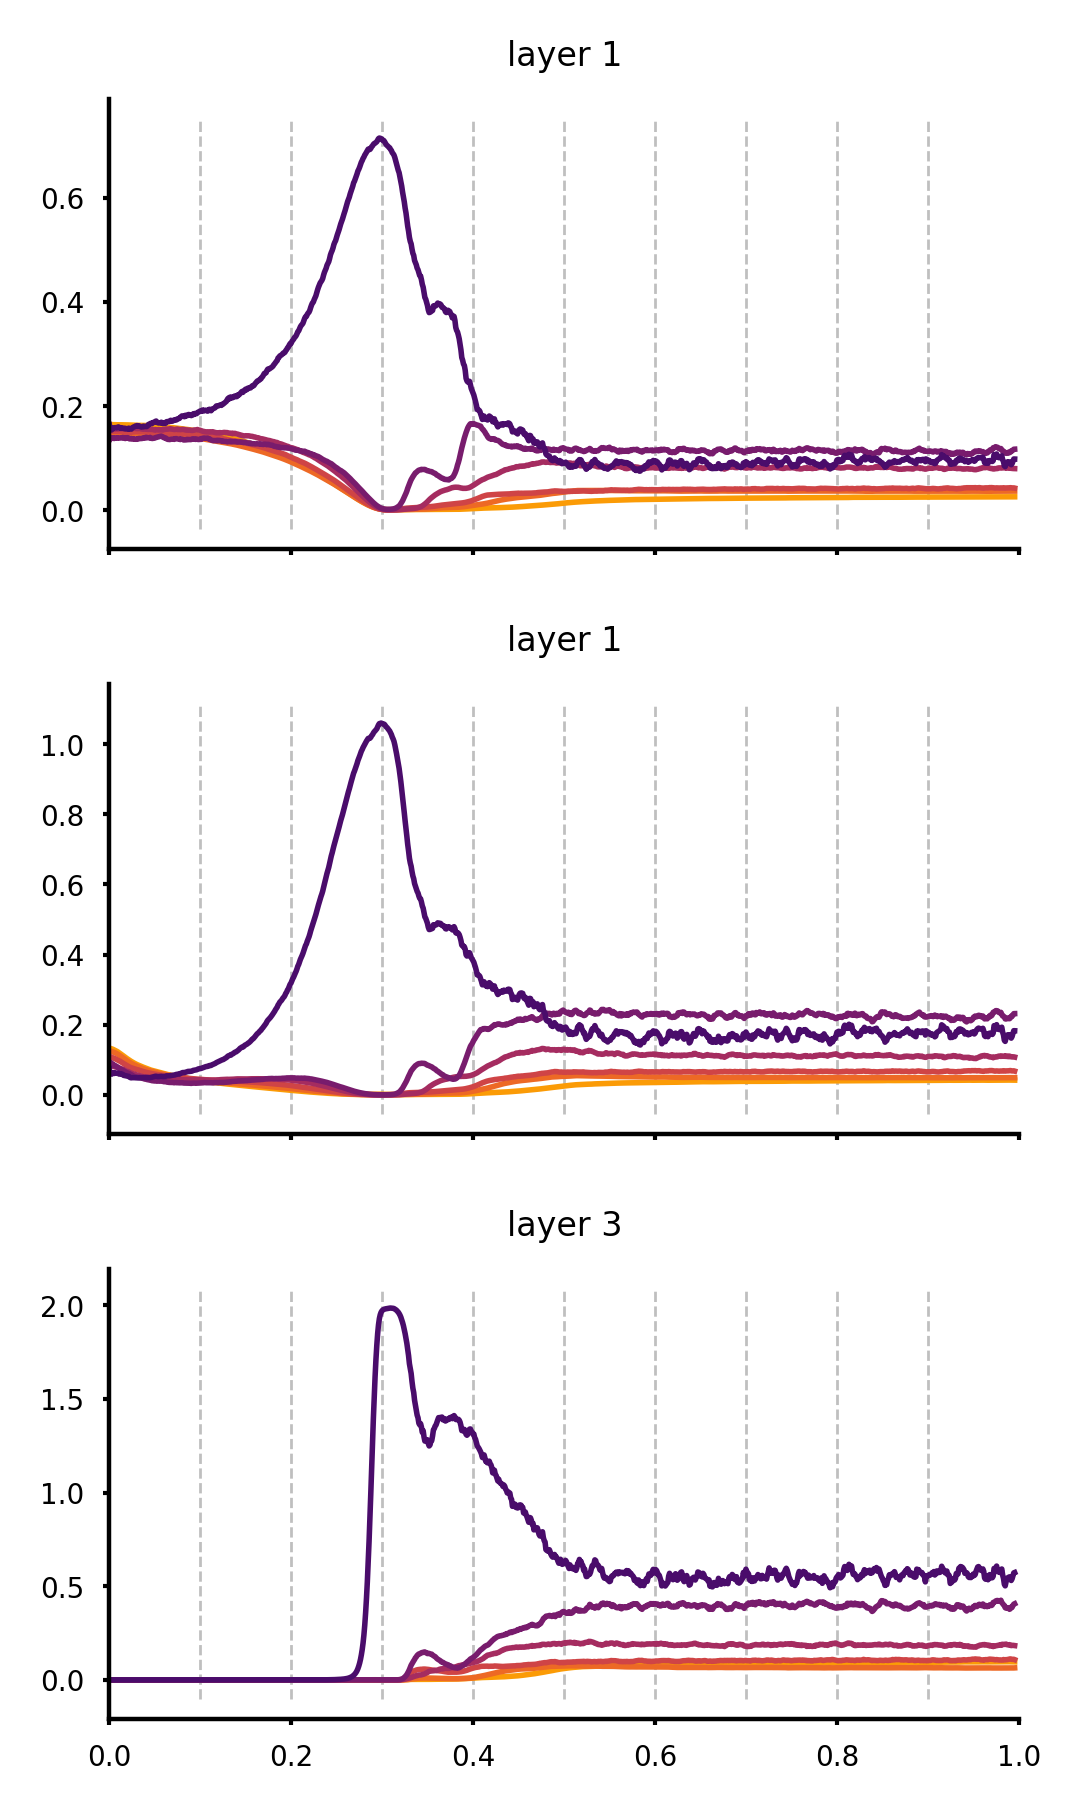

In [9]:

import matplotlib
matplotlib.rcParams['font.size'] = 5

av_window=10
xmin=0
xmax=1
num_colors=accuracies.shape[1]+2
color_fact=num_colors+2
h0=cm.get_cmap('inferno',color_fact)
line_cols=np.flipud(h0(np.arange(color_fact)/color_fact))
line_cols=line_cols[2:,:]

fig=plt.figure(1,figsize=(3.5,4.5),dpi=400,frameon=False)
mdl_idx=0

##########################################
layer_id=0
ax=plt.axes((.3,.7,.65,.25))
hier_all=[]

# plot layer 1 results
layer='layer_1_Linear'
hier_within_between=[]
for k_idx,_ in enumerate(hier_within_class):
    withins=[]
    betweens=[]
    for p_idx, X in enumerate(covar_res[layer]):
        if k_idx==0:
            within=np.asarray(X['center_covar'][0]['center_cov']).squeeze()[hier_within_class[k_idx]]
            between=np.asarray(X['center_covar'][0]['center_cov']).squeeze()[hier_between_class[k_idx]]
        
        else:
            within=np.asarray(X['center_covar'][k_idx-1]['center_cov']).squeeze()[hier_within_class[k_idx]]
            between=np.asarray(X['center_covar'][k_idx-1]['center_cov']).squeeze()[hier_between_class[k_idx]]
        withins.append(np.mean(within))
        betweens.append(np.mean(between))
    hier_within_between.append(np.stack([withins,betweens]))


for t in range(len(hier_within_between)):
    ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[t][1,:]-hier_within_between[t][0,:],av_window),color=line_cols[t,:],linewidth=1,label=f"n class: {hier_within_class[t].shape[0]}")




ax.set_title(f"layer {layer_id+1}")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=False)
ax.set_xlim((xmin,xmax))
ax.axes.xaxis.set_ticklabels([])
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5,alpha=.5)
ax.tick_params(direction='out', length=1, width=.75, colors='k',
               grid_color='k', grid_alpha=0.5)



##########################################


ax=plt.axes((.3,.7-.325,.65,.25))
# plot layer 1 results
layer='layer_2_Linear'
hier_within_between=[]
for k_idx,_ in enumerate(hier_within_class):
    withins=[]
    betweens=[]
    for p_idx, X in enumerate(covar_res[layer]):
        if k_idx==0:
            within=np.asarray(X['center_covar'][0]['center_cov']).squeeze()[hier_within_class[k_idx]]
            between=np.asarray(X['center_covar'][0]['center_cov']).squeeze()[hier_between_class[k_idx]]
        
        else:
            within=np.asarray(X['center_covar'][k_idx-1]['center_cov']).squeeze()[hier_within_class[k_idx]]
            between=np.asarray(X['center_covar'][k_idx-1]['center_cov']).squeeze()[hier_between_class[k_idx]]
        withins.append(np.mean(within))
        betweens.append(np.mean(between))
    hier_within_between.append(np.stack([withins,betweens]))




for t in range(len(hier_within_between)):
    ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[t][1,:]-hier_within_between[t][0,:],av_window),color=line_cols[t,:],linewidth=1,label=f"n class: {hier_within_class[t].shape[0]}")



ax.set_title(f"layer {layer_id+1}")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=False)

ax.set_xlim((xmin,xmax))

ax.axes.xaxis.set_ticklabels([])

ax.tick_params(direction='out', length=1, width=.75, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5,alpha=.5)


##########################################
layer_id=2
ax=plt.axes((.3,.7-2*.325,.65,.25))
layer='layer_3_Linear'
hier_within_between=[]
for k_idx,_ in enumerate(hier_within_class):
    withins=[]
    betweens=[]
    for p_idx, X in enumerate(covar_res[layer]):
        if k_idx==0:
            within=np.asarray(X['center_covar'][0]['center_cov']).squeeze()[hier_within_class[k_idx]]
            between=np.asarray(X['center_covar'][0]['center_cov']).squeeze()[hier_between_class[k_idx]]
        
        else:
            within=np.asarray(X['center_covar'][k_idx-1]['center_cov']).squeeze()[hier_within_class[k_idx]]
            between=np.asarray(X['center_covar'][k_idx-1]['center_cov']).squeeze()[hier_between_class[k_idx]]
        withins.append(np.mean(within))
        betweens.append(np.mean(between))
    hier_within_between.append(np.stack([withins,betweens]))


for t in range(len(hier_within_between)):
    ax.plot(moving_average(x_bar,av_window),moving_average(hier_within_between[t][1,:]-hier_within_between[t][0,:],av_window),color=line_cols[t,:],linewidth=1,label=f"n class: {hier_within_class[t].shape[0]}")



ax.set_title(f"layer {layer_id+1}")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=False)
ax.set_xlim((xmin,xmax))
#ax.axes.xaxis.set_ticklabels([])

ax.tick_params(direction='out', length=1, width=.75, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5,alpha=.5)


    

#ax=plt.subplot(2,3,(7,8)
plt.tight_layout()